In [1]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [3]:
# Import the dataset
data_path = "Cryptocurrency_History_Data.arff"

In [4]:
def truncate_data(data):
    if data.isdigit():
        if "." in data:
            return float(data)
        return int(data)

    if "-" in data:
        data = data.replace(" ", "")

    return data

def truncate_row(row):
    return [truncate_data(d) for d in row]

In [5]:
def read_data(path):
    with open(path, "r") as f:
        lines = f.readlines()

    ix = 0
    for (i, line) in enumerate(lines):
        if line.__contains__("@DATA"):
            ix = i
            break

    header = [l.split(" ")[1] for l in lines[:ix] if l.startswith("@ATTRIBUTE")]

    data = [truncate_row(l.replace("\n", "").strip().split(",")) for l in lines[ix+1:]]
    data = [l for l in data if len(l) == len(header)]


    # for i, line in enumerate(data):
    #     if len(line) != 17:
    #         print("Index:", i)

    return pd.DataFrame(data = data, columns = header)

In [6]:
import os

folder_path = r"C:\Users\HP FOLIO\Downloads\Crypto Forcasting"
print(os.listdir(folder_path))

['Cryptocurrency_History_Data', 'Cryptocurrency_History_Data.rar', 'Data_Dictionary.xlsx', 'Distribution of cryptocurrency types.png', 'Evolution of cryptocurrency prices over time.png', 'forecasting.ipynb', 'notebook.ipynb']


In [7]:
with open(r"C:\Users\HP FOLIO\Downloads\Crypto Forcasting\Cryptocurrency_History_Data", "r") as f:
    for i in range(10):
        print(f.readline())

% Context

% This is historical data on cryptocurrency tradings for the period from 2016-01-01 to 2021-02-21.

% If you enjoy this dataset please upvote so I can see it is popular and I need to update it.

% Thank you!

% Content

% This dataset will be good for data analysis in predicting the price for digital cryptocurrencies.

@RELATION Historical-data-on-the-trading-of-cryptocurrencies



@ATTRIBUTE trade_date STRING

@ATTRIBUTE volume REAL



In [8]:
import os

folder_path = r"C:\Users\HP FOLIO\Downloads\Crypto Forcasting"
print(os.listdir(folder_path))

['Cryptocurrency_History_Data', 'Cryptocurrency_History_Data.rar', 'Data_Dictionary.xlsx', 'Distribution of cryptocurrency types.png', 'Evolution of cryptocurrency prices over time.png', 'forecasting.ipynb', 'notebook.ipynb']


In [9]:
data_path = r"C:\Users\HP FOLIO\Downloads\Crypto Forcasting\Cryptocurrency_History_Data"
data = read_data(data_path)
print(data.head())

   trade_date      volume price_usd price_btc    market_cap  \
0  2016-01-01  36278900.0    434.33       1.0  6529299589.0   
1  2016-01-02  30096600.0    433.44       1.0  6517390487.0   
2  2016-01-03  39633800.0    430.01       1.0  6467429942.0   
3  2016-01-04  38477500.0    433.09       1.0  6515713340.0   
4  2016-01-05  34522600.0    431.96       1.0  6500393256.0   

  capitalization_change_1_day USD_price_change_1_day BTC_price_change_1_day  \
0                         0.0                    0.0                    0.0   
1         -0.0018239478580617    -0.0020491331476066                    0.0   
2         -0.0076657283462844    -0.0079134366925065                    0.0   
3          0.0074656236608678     0.0071626241250203                    0.0   
4         -0.0023512519966079    -0.0026091574499527                    0.0   

  crypto_name crypto_type ticker  max_supply              site_url  \
0     Bitcoin         0.0    BTC  21000000.0  https://bitcoin.org/   
1     

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382623 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   trade_date                   object
 1   volume                       object
 2   price_usd                    object
 3   price_btc                    object
 4   market_cap                   object
 5   capitalization_change_1_day  object
 6   USD_price_change_1_day       object
 7   BTC_price_change_1_day       object
 8   crypto_name                  object
 9   crypto_type                  object
 10  ticker                       object
 11  max_supply                   object
 12  site_url                     object
 13  github_url                   object
 14  minable                      object
 15  platform_name                object
 16  industry_name                object
dtypes: object(17)
memory usage: 309.0+ MB


In [11]:
# Feature cardinality
data.nunique()

trade_date                        1759
volume                         1036898
price_usd                       402078
price_btc                      2053690
market_cap                     1551095
capitalization_change_1_day    1859661
USD_price_change_1_day         1551435
BTC_price_change_1_day         2099347
crypto_name                       4137
crypto_type                          3
ticker                            3813
max_supply                         650
site_url                          4025
github_url                        2430
minable                              3
platform_name                       41
industry_name                       44
dtype: int64

In [12]:
data.shape

(2382623, 17)

In [13]:
# Describe data
data.describe(include="all")

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
count,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623
unique,1759,1036898,402078,2053690,1551095,1859661,1551435,2099347,4137,3,3813,650,4025,2430,3,41,44
top,2020-10-20,0.0,2e-06,0.0,0.0,0.0,0.0,0.0,?,1.0,?,?,?,?,0.0,?,?
freq,3576,209666,11399,3499,416052,519845,216020,3902,158849,1247697,158849,1686445,161185,845307,1609043,856378,677403


In [14]:
# Check for missing values
100 * data.isnull().sum() / len(data)

trade_date                     0.0
volume                         0.0
price_usd                      0.0
price_btc                      0.0
market_cap                     0.0
capitalization_change_1_day    0.0
USD_price_change_1_day         0.0
BTC_price_change_1_day         0.0
crypto_name                    0.0
crypto_type                    0.0
ticker                         0.0
max_supply                     0.0
site_url                       0.0
github_url                     0.0
minable                        0.0
platform_name                  0.0
industry_name                  0.0
dtype: float64

In [15]:
# verifying "?" for missing values
data["platform_name"].value_counts()

platform_name
?                        856378
XRP                      407962
VITE                     137308
Ontology                  82991
'INT Chain'               82837
EOS                       79832
NEM                       69480
ICON                      68030
Waves                     45954
Wanchain                  38034
TomoChain                 37770
'Bitcoin Cash'            30344
BitShares                 29661
'Vechain [Token]'         29657
PIVX                      28175
'Polkadot [IOU]'          25772
Ardor                     25118
NuBits                    25101
undefined                 23841
'Binance Coin'            23383
Zilliqa                   22849
Komodo                    20498
'RSK Smart Bitcoin'       19756
'V Systems'               17949
Klaytn                    16354
Fusion                    16259
'Binance Chain'           15711
Chiliz                    15636
Tron                      14357
GXChain                   13566
Qtum                      

In [16]:
data.loc[data["platform_name"] == "?"]

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
3492,2016-01-01,211767.0,0.005955,1.37107729146e-05,199716461.0,0.0,0.0,0.0,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3493,2016-01-02,278539.0,0.006065,1.39927094868e-05,203395183.0,0.018419723549978,0.018471872376154,0.020563142139939,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3494,2016-01-03,291723.0,0.006017,1.39926978442e-05,201799471.0,-0.0078453775377758,-0.0079142621599341,-8.320518169e-07,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3495,2016-01-04,310820.0,0.005958,1.3756955829e-05,199807683.0,-0.0098701348924745,-0.0098055509390062,-0.016847502734494,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3496,2016-01-05,381554.0,0.006044,1.39920362996e-05,202711354.0,0.014532329069648,0.01443437395099,0.01708811698869,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382618,2020-10-31,39594.53,0.04028,2.9228669348e-06,0.0,0.0,0.01307847082495,-0.0041580636369665,PlotX,1.0,PLOT,200000000.0,https://plotx.io/,https://github.com/plotx/smart-contracts,0.0,?,?
2382619,2020-11-01,15120.45,0.041831,3.0451091969e-06,0.0,0.0,0.038505461767627,0.04182272570905,PlotX,1.0,PLOT,200000000.0,https://plotx.io/,https://github.com/plotx/smart-contracts,0.0,?,?
2382620,2020-10-30,14383.05,1.58,0.0001166351210495,0.0,0.0,-0.076023391812865,-0.083433473421533,SableAssent,1.0,SAC1,6000000001.0,https://www.sableassent.com,https://attachments.office.net/owa/daryl40sabl...,0.0,?,?
2382621,2020-10-31,3720.08,1.5,0.000108845590919,0.0,0.0,-0.050632911392405,-0.066785459305568,SableAssent,1.0,SAC1,6000000001.0,https://www.sableassent.com,https://attachments.office.net/owa/daryl40sabl...,0.0,?,?


In [17]:
# replacing "?" with NaN
data.replace("?", np.nan, inplace = True)

In [18]:
# confirming the status of the dataset with respect to missing values
100 * data.isnull().sum() / len(data)

trade_date                      0.000000
volume                          0.000000
price_usd                       0.000000
price_btc                       0.000000
market_cap                      0.000000
capitalization_change_1_day     0.000000
USD_price_change_1_day          0.000000
BTC_price_change_1_day          0.000000
crypto_name                     6.666980
crypto_type                     6.666980
ticker                          6.666980
max_supply                     70.781026
site_url                        6.765023
github_url                     35.478001
minable                         6.666980
platform_name                  35.942656
industry_name                  28.430977
dtype: float64

In [19]:
# As can be seen, more than half of the features are plauged with missing values. However, some features like `platform_name` and `github_link` are strongly plagued by this issue.

# Cardinality

# We can take a look at the number of values each feature can take.

data.nunique()

trade_date                        1759
volume                         1036898
price_usd                       402078
price_btc                      2053690
market_cap                     1551095
capitalization_change_1_day    1859661
USD_price_change_1_day         1551435
BTC_price_change_1_day         2099347
crypto_name                       4136
crypto_type                          2
ticker                            3812
max_supply                         649
site_url                          4024
github_url                        2429
minable                              2
platform_name                       40
industry_name                       43
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382623 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   trade_date                   object
 1   volume                       object
 2   price_usd                    object
 3   price_btc                    object
 4   market_cap                   object
 5   capitalization_change_1_day  object
 6   USD_price_change_1_day       object
 7   BTC_price_change_1_day       object
 8   crypto_name                  object
 9   crypto_type                  object
 10  ticker                       object
 11  max_supply                   object
 12  site_url                     object
 13  github_url                   object
 14  minable                      object
 15  platform_name                object
 16  industry_name                object
dtypes: object(17)
memory usage: 309.0+ MB


In [21]:
# Distribution of crypto types
data["crypto_type"].value_counts(normalize = True)

crypto_type
1.0    0.561072
0.0    0.438928
Name: proportion, dtype: float64

In [22]:
# Distribution of crypto mineability
data["minable"].value_counts(normalize = True)

minable
0.0    0.723564
1.0    0.276436
Name: proportion, dtype: float64

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


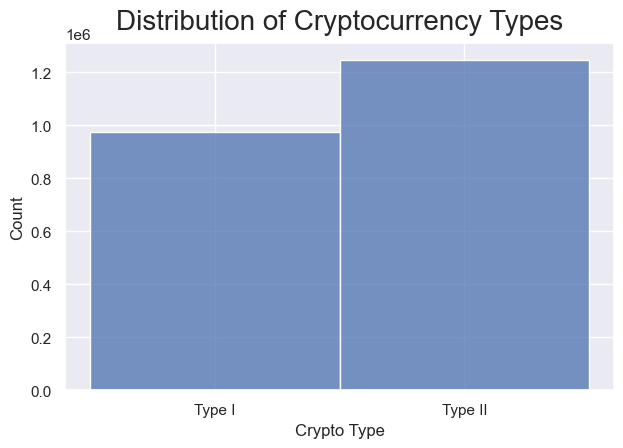

In [23]:
# Line chart of crypto prices over time
sns.histplot(x = data["crypto_type"], bins = 10)

plt.xlabel("Crypto Type")
plt.ylabel("Count")

plt.xticks([0, 1], ["Type I", "Type II"])

plt.title("Distribution of Cryptocurrency Types", fontsize=20, pad=10)

plt.tight_layout()
plt.show()

In [24]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [25]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 23.


In [26]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

In [27]:
# Group columns by intended data type
# int_types → categorical/numeric fields that should be stored as integers (e.g., flags like minable, supply counts, etc.)
# float_types → continuous numeric fields (e.g., prices, market cap, percentage changes)
int_types = ["minable", "volume", "crypto_type", "max_supply"]
float_types = [
    "price_usd", "price_btc", "market_cap", "capitalization_change_1_day",
    "USD_price_change_1_day", "BTC_price_change_1_day"
]

In [28]:
for column in int_types:
    # try:
    #     data[column] = pd.to_numeric(data[column], downcast = "integer", errors='coerce').astype(pd.Int64Dtype())
    # except:
    data[column] = data[column].astype("Float32")
    data[column] = data[column].astype("Int64")

for column in float_types:
    data[column] = data[column].astype(float)

data["trade_date"] = pd.to_datetime(data["trade_date"])

In [29]:
data.head()

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
1,2016-01-02,30096600,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
2,2016-01-03,39633800,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
3,2016-01-04,38477500,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
4,2016-01-05,34522600,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2382600 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trade_date                   datetime64[ns]
 1   volume                       Int64         
 2   price_usd                    float64       
 3   price_btc                    float64       
 4   market_cap                   float64       
 5   capitalization_change_1_day  float64       
 6   USD_price_change_1_day       float64       
 7   BTC_price_change_1_day       float64       
 8   crypto_name                  object        
 9   crypto_type                  Int64         
 10  ticker                       object        
 11  max_supply                   Int64         
 12  site_url                     object        
 13  github_url                   object        
 14  minable                      Int64         
 15  platform_name                object        
 16  indus

In [31]:
100 * data.isnull().sum() / len(data)

trade_date                      0.000000
volume                          0.000000
price_usd                       0.000000
price_btc                       0.000000
market_cap                      0.000000
capitalization_change_1_day     0.000000
USD_price_change_1_day          0.000000
BTC_price_change_1_day          0.000000
crypto_name                     6.666079
crypto_type                     6.666079
ticker                          6.666079
max_supply                     70.780744
site_url                        6.764123
github_url                     35.477378
minable                         6.666079
platform_name                  35.942038
industry_name                  28.430286
dtype: float64

In [32]:
# Distribution of crypto coins
data["crypto_name"].value_counts()

crypto_name
Feathercoin        1752
FLO                1752
Clams              1751
DigitalNote        1751
Primecoin          1751
                   ... 
UNICORE               2
'Free Tool Box'       2
'ESAX Token'          1
Pmeer                 1
DAOFi                 1
Name: count, Length: 4136, dtype: int64

In [33]:
# Number of unique crypto coins
print(len(data["crypto_name"].unique()))

4137


In [34]:
# Show the distribution (counts) of selected major cryptocurrencies
# From all ~4000+ crypto names, we focus on the most popular ones: 
# Bitcoin, Ethereum, Litecoin, and Dogecoin
data["crypto_name"].value_counts()[["Bitcoin", "Ethereum", "Litecoin", "Dogecoin"]]

crypto_name
Bitcoin     1746
Ethereum    1746
Litecoin    1746
Dogecoin    1743
Name: count, dtype: int64

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


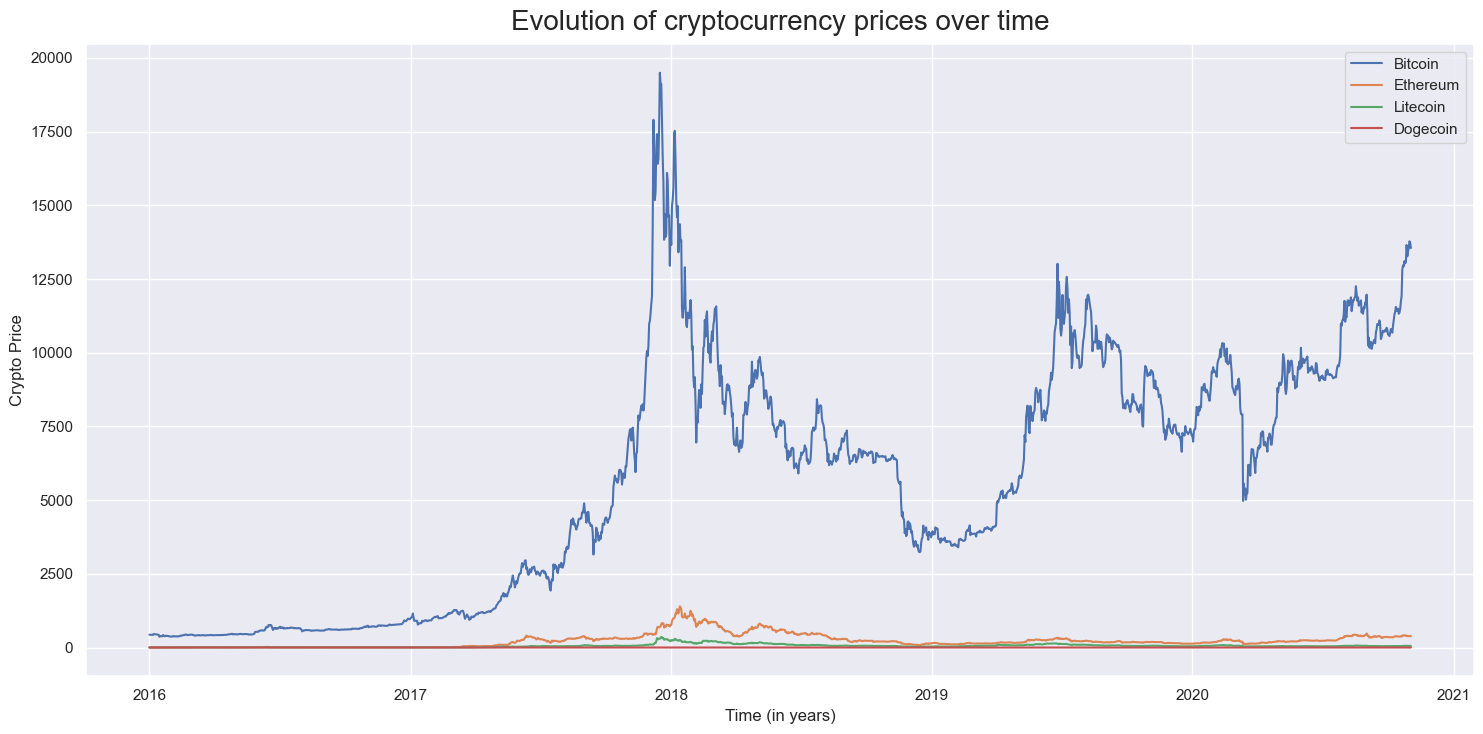

In [35]:
# Distribution of Cryptocurrency Price & Market Capitalization
# Line chart of crypto prices over time
coins_of_interest = ["Bitcoin", "Ethereum", "Litecoin", "Dogecoin"]
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(coins_of_interest)]
sns.lineplot(data = df, x = "trade_date", y = "price_usd", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Crypto Price")

plt.title("Evolution of cryptocurrency prices over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


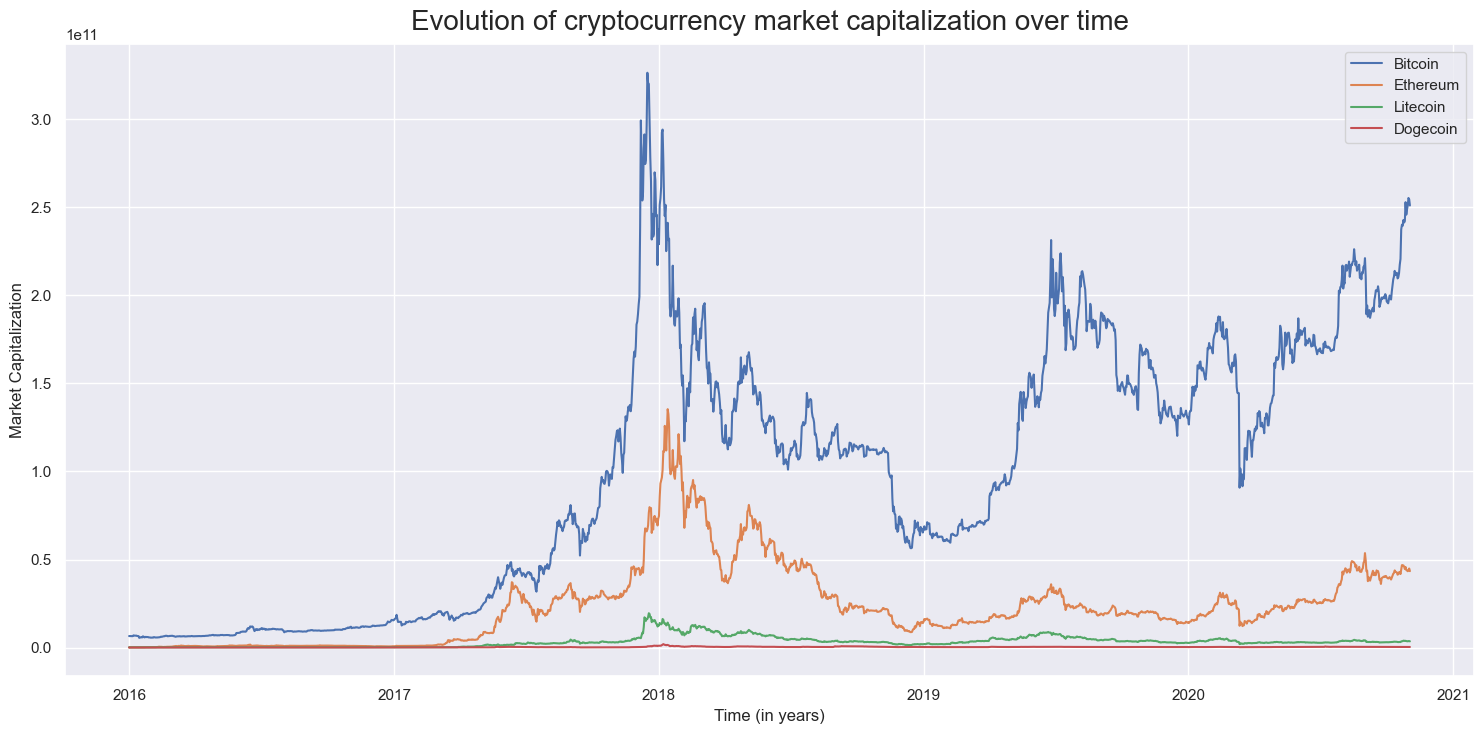

In [36]:
# Line chart of crypto market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(coins_of_interest)]
sns.lineplot(data = df, x = "trade_date", y = "market_cap", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Capitalization")

plt.title("Evolution of cryptocurrency market capitalization over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_12960\4291260557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cap_per_price"] = df["market_cap"] / df["price_usd"] # Compute market cap per price
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


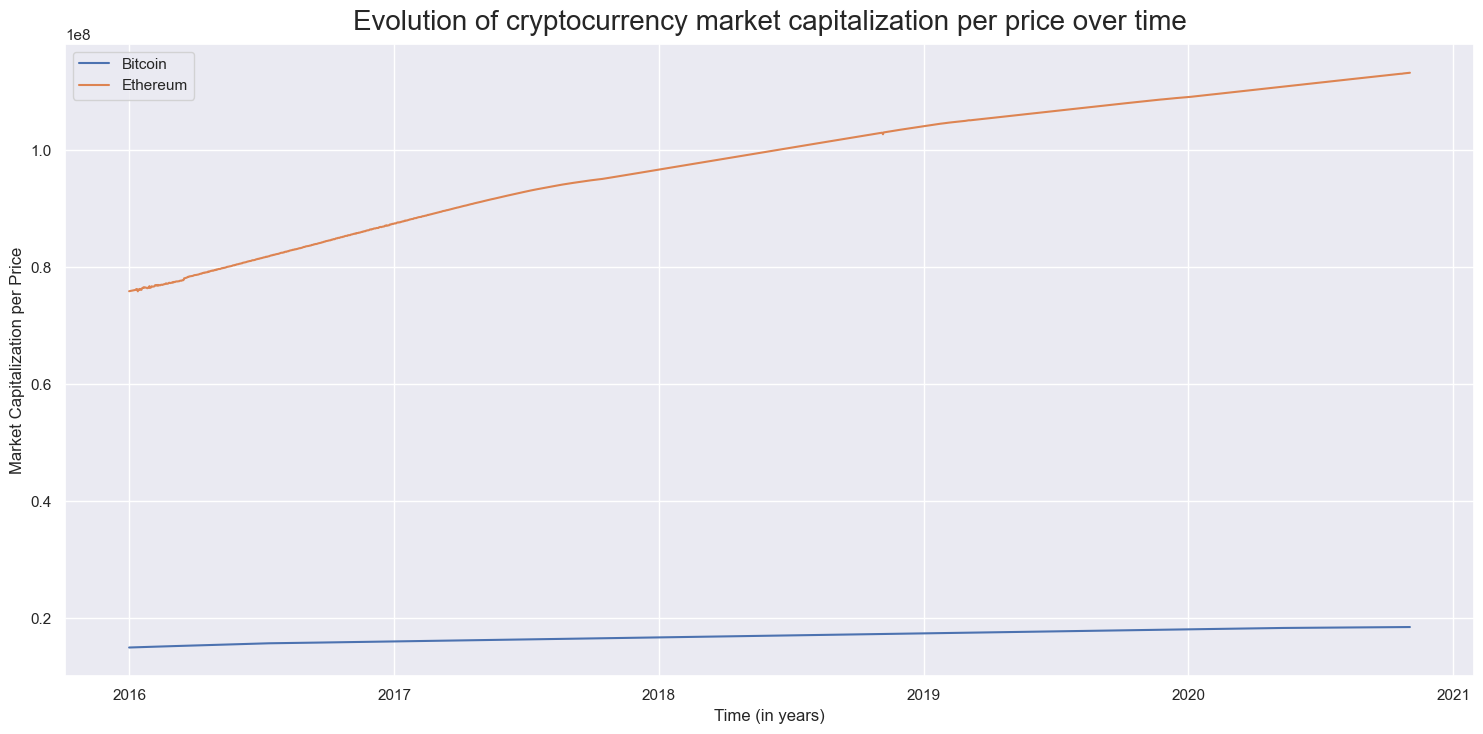

In [37]:
# Line chart comparing Ethereum prices and market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(["Ethereum", "Bitcoin"])]
df["cap_per_price"] = df["market_cap"] / df["price_usd"] # Compute market cap per price

sns.lineplot(data = df, x = "trade_date", y = "cap_per_price", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Capitalization per Price")

plt.title("Evolution of cryptocurrency market capitalization per price over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_12960\2604793824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cap_change_per_price_change"] = df["capitalization_change_1_day"] / df["USD_price_change_1_day"] # Compute market cap per price
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context

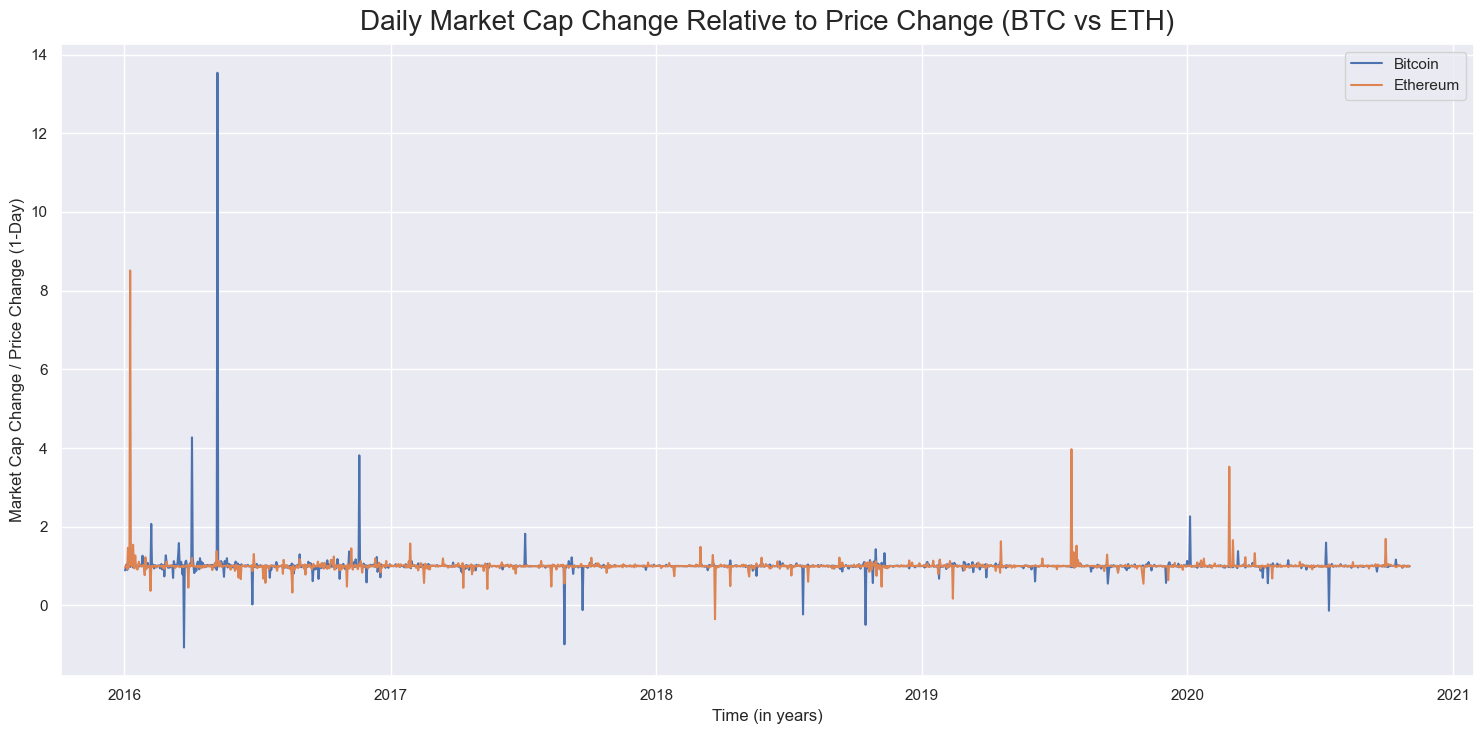

In [38]:
# Line chart comparing Ethereum prices and market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(["Ethereum", "Bitcoin"])]
df["cap_change_per_price_change"] = df["capitalization_change_1_day"] / df["USD_price_change_1_day"] # Compute market cap per price

sns.lineplot(data = df, x = "trade_date", y = "cap_change_per_price_change", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Cap Change / Price Change (1-Day)")

plt.title("Daily Market Cap Change Relative to Price Change (BTC vs ETH)", fontsize=20, pad=10)

plt.legend()

plt.tight_layout()
plt.show()

In [39]:
df.columns

Index(['trade_date', 'volume', 'price_usd', 'price_btc', 'market_cap',
       'capitalization_change_1_day', 'USD_price_change_1_day',
       'BTC_price_change_1_day', 'crypto_name', 'crypto_type', 'ticker',
       'max_supply', 'site_url', 'github_url', 'minable', 'platform_name',
       'industry_name', 'cap_change_per_price_change'],
      dtype='object')

In [40]:
# Feature Correlation
correlation = data.select_dtypes(exclude=["object", "datetime"]).corr(method = "pearson")
correlation

,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_type,max_supply,minable
volume,1.000000,-0.000171,-0.000170,-0.000018,-0.000024,-0.000158,-0.000159,-0.014143,-0.000168,0.021726
price_usd,-0.000171,1.000000,0.998659,-0.000009,-0.000003,-0.000019,-0.000019,0.004437,-0.000123,-0.003101
price_btc,-0.000170,0.998659,1.000000,-0.000009,-0.000003,-0.000019,-0.000020,0.004430,-0.000197,-0.003097
market_cap,-0.000018,-0.000009,-0.000009,1.000000,0.004697,0.000227,0.000252,0.001649,-0.000011,-0.001151
capitalization_change_1_day,-0.000024,-0.000003,-0.000003,0.004697,1.000000,0.050131,0.050497,0.000607,-0.000006,-0.000427
USD_price_change_1_day,-0.000158,-0.000019,-0.000019,0.000227,0.050131,1.000000,0.999836,-0.001393,-0.000011,0.001616
BTC_price_change_1_day,-0.000159,-0.000019,-0.000020,0.000252,0.050497,0.999836,1.000000,-0.001410,-0.000011,0.001629
crypto_type,-0.014143,0.004437,0.004430,0.001649,0.000607,-0.001393,-0.001410,1.000000,0.004305,-0.688622
max_supply,-0.000168,-0.000123,-0.000197,-0.000011,-0.000006,-0.000011,-0.000011,0.004305,1.000000,-0.003097
minable,0.021726,-0.003101,-0.003097,-0.001151,-0.000427,0.001616,0.001629,-0.688622,-0.003097,1.000000


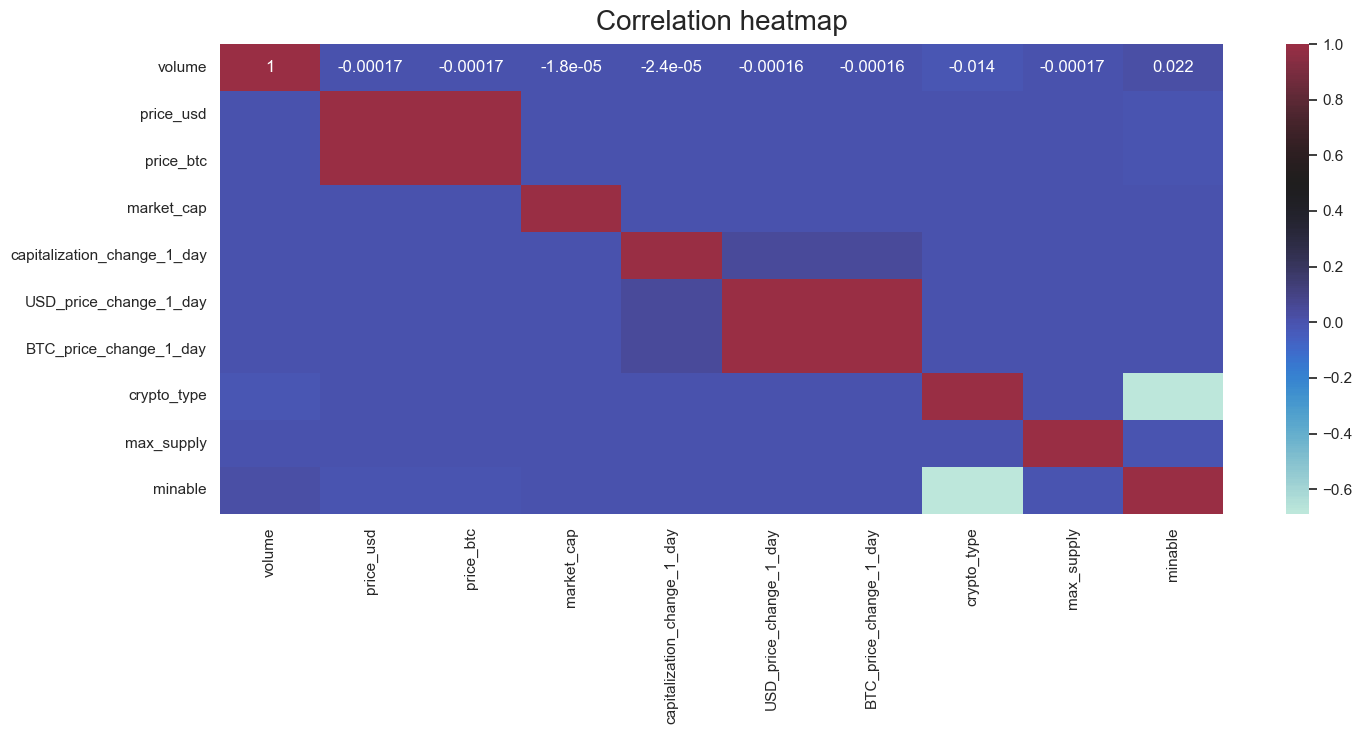

In [41]:
# Correlation heat map

plt.figure(figsize = (15, 7.5))

sns.heatmap(correlation, center=.5, annot = True)

plt.title("Correlation heatmap", fontsize = 20, pad = 10)

plt.tight_layout()
plt.show()

In [42]:
# Data Preparation
# Select Bitcoin data
df = data.loc[data["crypto_name"] == "Bitcoin", ["trade_date", "price_usd"]]

df.set_index("trade_date", inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('D')

df.head()

,price_usd
trade_date,
2016-01-01,434.33
2016-01-02,433.44
2016-01-03,430.01
2016-01-04,433.09
2016-01-05,431.96


In [43]:
df.isnull().sum()

price_usd    0
dtype: int64

In [44]:
df.nunique()

price_usd    1740
dtype: int64

In [45]:
df.shape

(1746, 1)

In [46]:
# Data modelling
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

from catboost import CatBoostRegressor

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HoltExponentialSmoothing

In [47]:
# Modelling

def obtain_best(aic_values, bic_values, pq_values):
    best_aic = min(aic_values)
    best_bic = min(bic_values)

    best_ix = aic_values.index(min(aic_values))
    best_params = pq_values[best_ix]

    for i in range(len(aic_values)):
        print(f"AIC = {aic_values[i]},     BIC = {bic_values[i]},        (p, q) = {pq_values[i]}")

    return best_aic, best_bic, best_params

In [48]:
def optimize_exp_model(model, **kwargs):
    # Test and optimize ARIMA model
    trends = kwargs["trend"]
    damped_trends = kwargs["damped_trend"]
    seasonals = kwargs["seasonal"]
    seasonal_periods = kwargs["seasonal_periods"]
    use_boxcox = kwargs["use_boxcox"]

    aic_values = []
    bic_values = []
    pq_values = []

    for trend in trends:
        for damped_trend in damped_trends:
            for seasonal in seasonals:
                for seasonal_period in seasonal_periods:
                    for use in use_boxcox:
                        try:
                            try: #Holt-Winters
                                exp_model = model(
                                    endog = df, trend = trend, damped_trend = damped_trend,
                                    seasonal = seasonal, seasonal_periods = seasonal_period, use_boxcox = use
                                )

                            except: # Exponential
                                exp_model = model(
                                    endog = df, trend = trend, damped_trend = damped_trend,
                                    seasonal = seasonal_period,
                                )
                            try:
                                results = exp_model.fit(maxiter = kwargs["max_iter"])
                            except:
                                results = exp_model.fit()

                            r = get_metrics(results = results)

                            aic_values.append(r["AIC"])
                            bic_values.append(r["BIC"])
                            params = {
                                "trend": trend,
                                "damped_trend": damped_trend,
                                "seasonal": seasonal,
                                "seasonal_periods": seasonal_period,
                                "use_boxcox": use
                            }
                            pq_values.append(params)
                        except:
                            exp_model = None
                            pass

    seasonal_order = None

    best_aic, best_bic, best_parameters = obtain_best(aic_values, bic_values, pq_values)

    return best_aic, best_bic, best_parameters, seasonal_order

In [49]:
def optimize_arima_model(model, **kwargs):
    # Test and optimize ARIMA model
    p_range = q_range = list(range(kwargs["lower"], kwargs["upper"]))  # taking values from 0 to 5
    d = kwargs["d"]

    aic_values = []
    bic_values = []
    pq_values = []

    for p in p_range:
        for q in q_range:
            try:
                arima_model = model(endog = df, order = (p, d, q), )
                try:
                    seasonal_order = (p, d, q, kwargs["s"])
                    arima_model.seasonal_order = seasonal_order
                    results = arima_model.fit(max_iter = kwargs["max_iter"])
                except:
                    results = arima_model.fit()

                r = get_metrics(results = results)

                aic_values.append(r["AIC"])
                bic_values.append(r["BIC"])
                pq_values.append((p, q))
            except:
                arima_model = None
                seasonal_order = None
                pass

    best_aic, best_bic, best_parameters = obtain_best(aic_values, bic_values, pq_values)

    return best_aic, best_bic, best_parameters, seasonal_order

In [50]:
def optimize_model(model, **kwargs):
    try:
        return optimize_arima_model(model, **kwargs)
    except:
        return optimize_exp_model(model, **kwargs)

In [51]:
def get_metrics(results):
    results_ = results.summary().__str__().split("\n")
    aic = results_[4].split("AIC")[-1].strip()
    bic = results_[5].split("BIC")[-1].strip()

    return {"AIC": float(aic) if "." in aic else int(aic), "BIC": float(bic) if "." in bic else int(bic)}

In [52]:
# Set model keywords
arima_kwargs = {
    "lower": 0,
    "upper": 10,
    "d": 0,
    "s": 4,
    "max_iter": 500
}

In [53]:
# Get optimal parameters for SARIMAX model
sarimax_aic_, sarimax_bic_, sarimax_params, seasonal_order = optimize_model(SARIMAX, **arima_kwargs)

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported

AIC = 35843.714,     BIC = 35849.179,        (p, q) = (0, 0)
AIC = 33531.297,     BIC = 33542.227,        (p, q) = (0, 1)
AIC = 33251.21,     BIC = 33267.606,        (p, q) = (0, 2)
AIC = 32064.416,     BIC = 32086.276,        (p, q) = (0, 3)
AIC = 32107.784,     BIC = 32135.109,        (p, q) = (0, 4)
AIC = 30402.971,     BIC = 30435.762,        (p, q) = (0, 5)
AIC = 33849.04,     BIC = 33887.296,        (p, q) = (0, 6)
AIC = 33783.131,     BIC = 33826.852,        (p, q) = (0, 7)
AIC = 32287.918,     BIC = 32337.104,        (p, q) = (0, 8)
AIC = 33355.093,     BIC = 33409.744,        (p, q) = (0, 9)
AIC = 25128.404,     BIC = 25139.334,        (p, q) = (1, 0)
AIC = 25132.979,     BIC = 25149.375,        (p, q) = (1, 1)
AIC = 25136.668,     BIC = 25158.528,        (p, q) = (1, 2)
AIC = 25138.099,     BIC = 25165.425,        (p, q) = (1, 3)
AIC = 25132.925,     BIC = 25165.715,        (p, q) = (1, 4)
AIC = 25123.849,     BIC = 25162.104,        (p, q) = (1, 5)
AIC = 25125.022,     BIC =

In [54]:
# Best SARIMAX model
d = 0
sarimax_p, sarimax_q = sarimax_params
try:
    sarimax_model = SARIMAX(endog = df, order=(sarimax_p, d, sarimax_q), seasonal_order = seasonal_order)
except:
    sarimax_model = SARIMAX(endog = df, order=(sarimax_p, d, sarimax_q))

sarimax_model = sarimax_model.fit(max_iter = arima_kwargs["max_iter"])

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
# Get optimal parameters for ARIMA model
arima_aic, arima_bic, arima_params, _ = optimize_model(sm.tsa.arima.ARIMA, **arima_kwargs)

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\bas

AIC = 45258.287,     BIC = 45269.217,        (p, q) = (0, 0)
AIC = 31728.148,     BIC = 31744.544,        (p, q) = (0, 1)
AIC = 31091.239,     BIC = 31113.099,        (p, q) = (0, 2)
AIC = 28860.696,     BIC = 28888.021,        (p, q) = (0, 3)
AIC = 28535.826,     BIC = 28568.617,        (p, q) = (0, 4)
AIC = 27542.662,     BIC = 27580.918,        (p, q) = (0, 5)
AIC = 29959.878,     BIC = 30003.599,        (p, q) = (0, 6)
AIC = 31447.669,     BIC = 31496.855,        (p, q) = (0, 7)
AIC = 26537.776,     BIC = 26592.427,        (p, q) = (0, 8)
AIC = 31877.596,     BIC = 31937.712,        (p, q) = (0, 9)
AIC = 25128.236,     BIC = 25144.631,        (p, q) = (1, 0)
AIC = 25129.624,     BIC = 25151.484,        (p, q) = (1, 1)
AIC = 25131.57,     BIC = 25158.895,        (p, q) = (1, 2)
AIC = 25133.579,     BIC = 25166.369,        (p, q) = (1, 3)
AIC = 25132.852,     BIC = 25171.108,        (p, q) = (1, 4)
AIC = 25121.907,     BIC = 25165.628,        (p, q) = (1, 5)
AIC = 25122.667,     BIC 

In [56]:
# Best ARIMA model
arima_p, arima_q = arima_params
arima_model = sm.tsa.arima.ARIMA(endog = df, order=(arima_p, d, arima_q))

arima_model = arima_model.fit()

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
# Exponetial Smoothing model
# Set model keywords
exp_kwargs = {
    "trend": ["add", "mul", "multiplicative", "additive"],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", "multiplicative", "additive"],
    "seasonal_periods": [4, 12],
    "use_boxcox": [True, False],
    "maxiter": 500
}

exp = ExponentialSmoothing(endog = df)

exp = exp.fit(max_iter = 12)

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(


In [58]:
# Get optimal parameters for exponential smoothing model
exp_aic, exp_bic, exp_params, _ = optimize_model(ExponentialSmoothing, **exp_kwargs)

AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 25146.323,     BIC = 25244.695,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': True}
AIC = 25146.323,     BIC = 25244.695,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': False}
AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 25146.323,     BIC = 25244.695,        (p, q) = {'trend': '

In [59]:
exp_params

{'trend': 'add',
 'damped_trend': False,
 'seasonal': 'add',
 'seasonal_periods': 4,
 'use_boxcox': True}

In [60]:
# Generate parameters for ExponentialSmoothing instance
simple_exp_params = {
    k: v for k, v in exp_params.items() if k not in ["seasonal_periods", "use_boxcox"]
}
simple_exp_params["seasonal"] = exp_params["seasonal_periods"]

In [61]:
# Best ExponentialSmoothing model
exp_model = ExponentialSmoothing(endog = df, **simple_exp_params)

exp_model = exp_model.fit(maxiter = exp_kwargs["maxiter"])

In [62]:
# Get optimal parameters for Holt exponential smoothing model
holt_aic, holt_bic, holt_params, _ = optimize_model(HoltExponentialSmoothing, **exp_kwargs)

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimiz

AIC = 20176.359,     BIC = 20225.545,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 20177.674,     BIC = 20226.859,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 20187.393,     BIC = 20280.299,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': True}
AIC = 20190.318,     BIC = 20283.225,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': False}
AIC = 20171.857,     BIC = 20221.043,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 20198.038,     BIC = 20247.224,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 20180.973,     BIC = 20273.879,        (p, q) = {'trend': '

c:\Users\HP FOLIO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
holt_params

{'trend': 'add',
 'damped_trend': False,
 'seasonal': 'mul',
 'seasonal_periods': 4,
 'use_boxcox': True}

In [64]:
# Best HoltExponentialSmoothing model
holt_model = HoltExponentialSmoothing(endog = df, **holt_params)

holt_model = holt_model.fit()

In [65]:
# model evaluation
# Mean absolute error implementation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mape = np.mean(np.abs(y_true - y_pred) / (y_true + 1)) * 100
    return mape

In [66]:
def visualize_results(model_name, df, predictions, num_steps = 100, first_timestep = True):

    if first_timestep:
        x, y = list(map(lambda x: x.strftime("%Y-%m-%d"), df.index[:num_steps].tolist())), list(df.price_usd)[:num_steps]
        y_ = list(predictions)[:num_steps]
        position = "First"
    else:
        x, y = list(map(lambda x: x.strftime("%Y-%m-%d"), df.index[-num_steps:].tolist())), list(df.price_usd)[-num_steps:]
        y_ = list(predictions)[-num_steps:]
        position = "Last"

    title = f"Actual and Predicted Prices via {model_name} in U.S. Dollars ({position} {num_steps} timesteps)"

    plt.figure(figsize=(20, 7.5))
    plt.plot(x, y, label="Actual")
    plt.plot(x, y_, 'r', label="Predicted")

    plt.xticks(rotation = 90)

    plt.xlabel("Time (in Days)")
    plt.ylabel("Price (US Dollars)")
    plt.title(title)

    plt.legend()

    # plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
    plt.show(); plt.close()

    return

In [67]:
def evaluate_model(model, df, num_steps = 100, first_timestep = True):
    model_name = model.__class__.__name__[:-14]
    print(f"Evaluating {model_name} model...\n")

    predictions = model.predict(start=0, end=len(df)-1)

    mse = mean_squared_error(list(df.price_usd), list(predictions))
    print("Mean Squared Error:", mse)

    mape = mean_absolute_percentage_error(list(df.price_usd), list(predictions))
    print("Mean Absolute Percentage Error:", mape)

    mae = mean_absolute_error(list(df.price_usd), list(predictions))
    print("Mean Absolute Error:", mae)

    visualize_results(model_name, df, predictions, num_steps, first_timestep)

    return

Evaluating ARIMA model...

Mean Squared Error: 115001.30417396782
Mean Absolute Percentage Error: 3.3305965234526584
Mean Absolute Error: 166.37272485952508


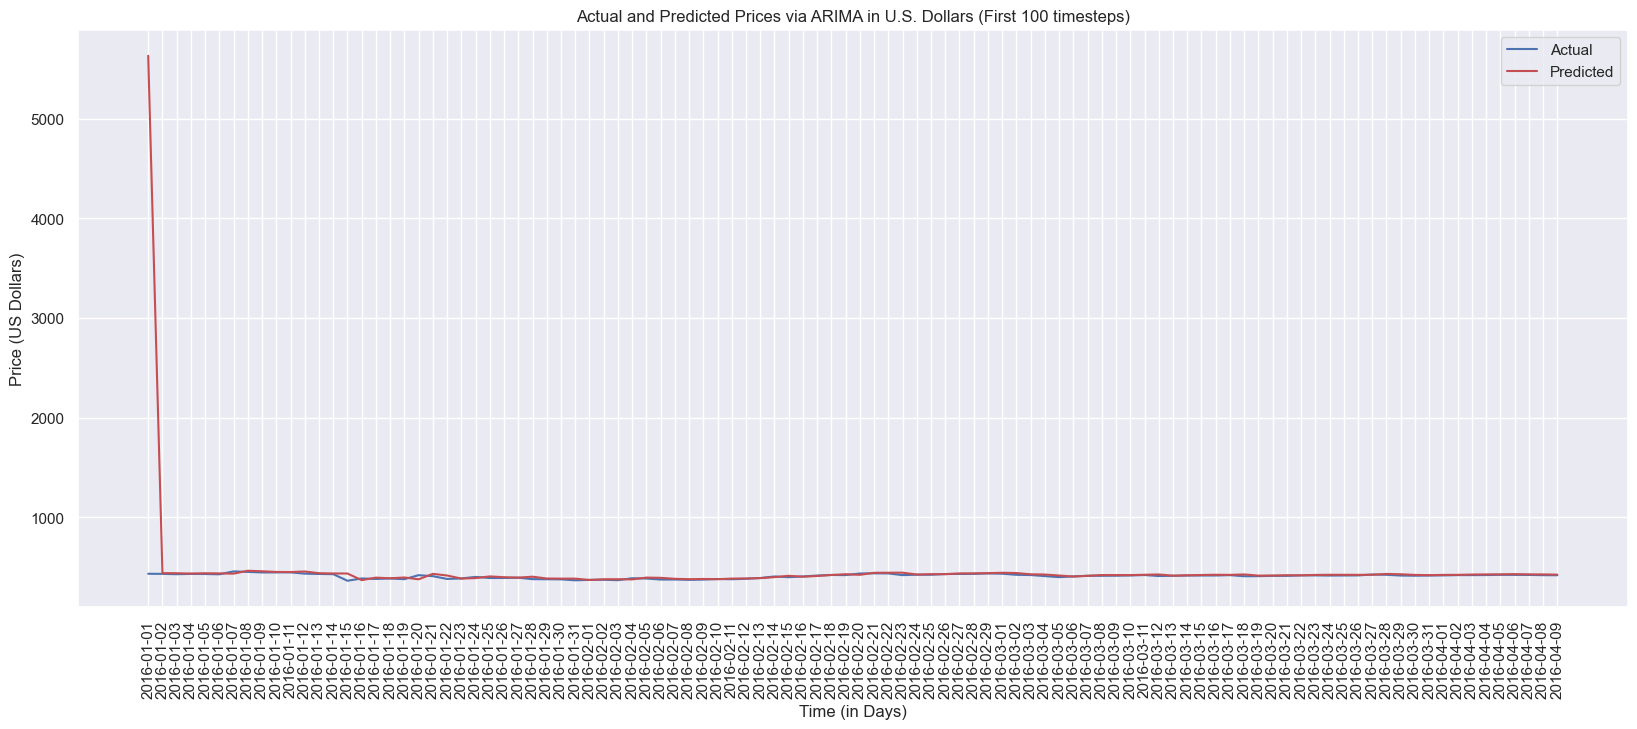

In [68]:
evaluate_model(arima_model, df)

Evaluating ARIMA model...

Mean Squared Error: 115001.30417396782
Mean Absolute Percentage Error: 3.3305965234526584
Mean Absolute Error: 166.37272485952508


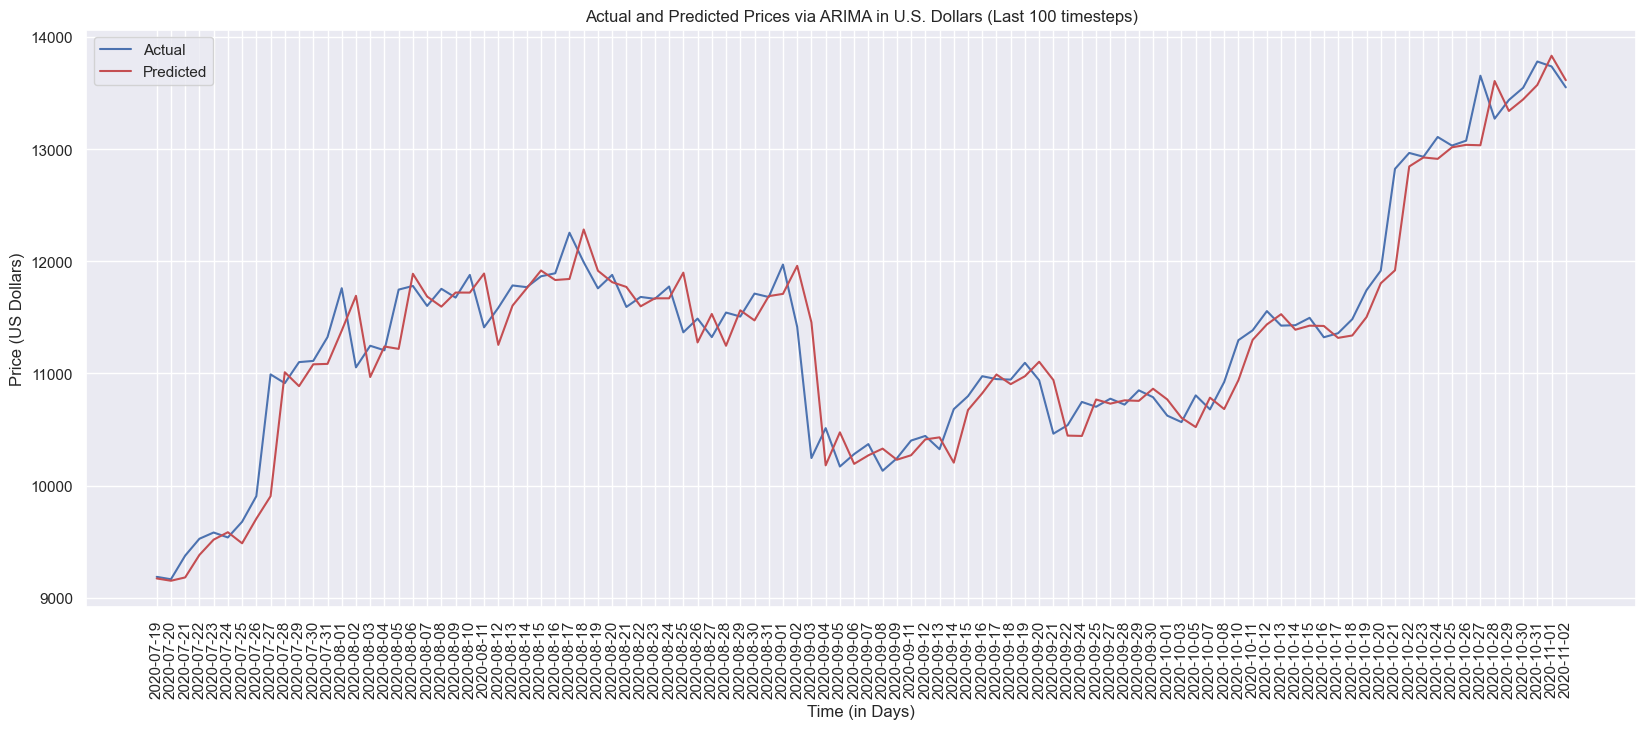

In [69]:
evaluate_model(arima_model, df, first_timestep = False)

Evaluating SARIMAX model...

Mean Squared Error: 48159212.34538379
Mean Absolute Percentage Error: 99.9424250937114
Mean Absolute Error: 5631.871529209621


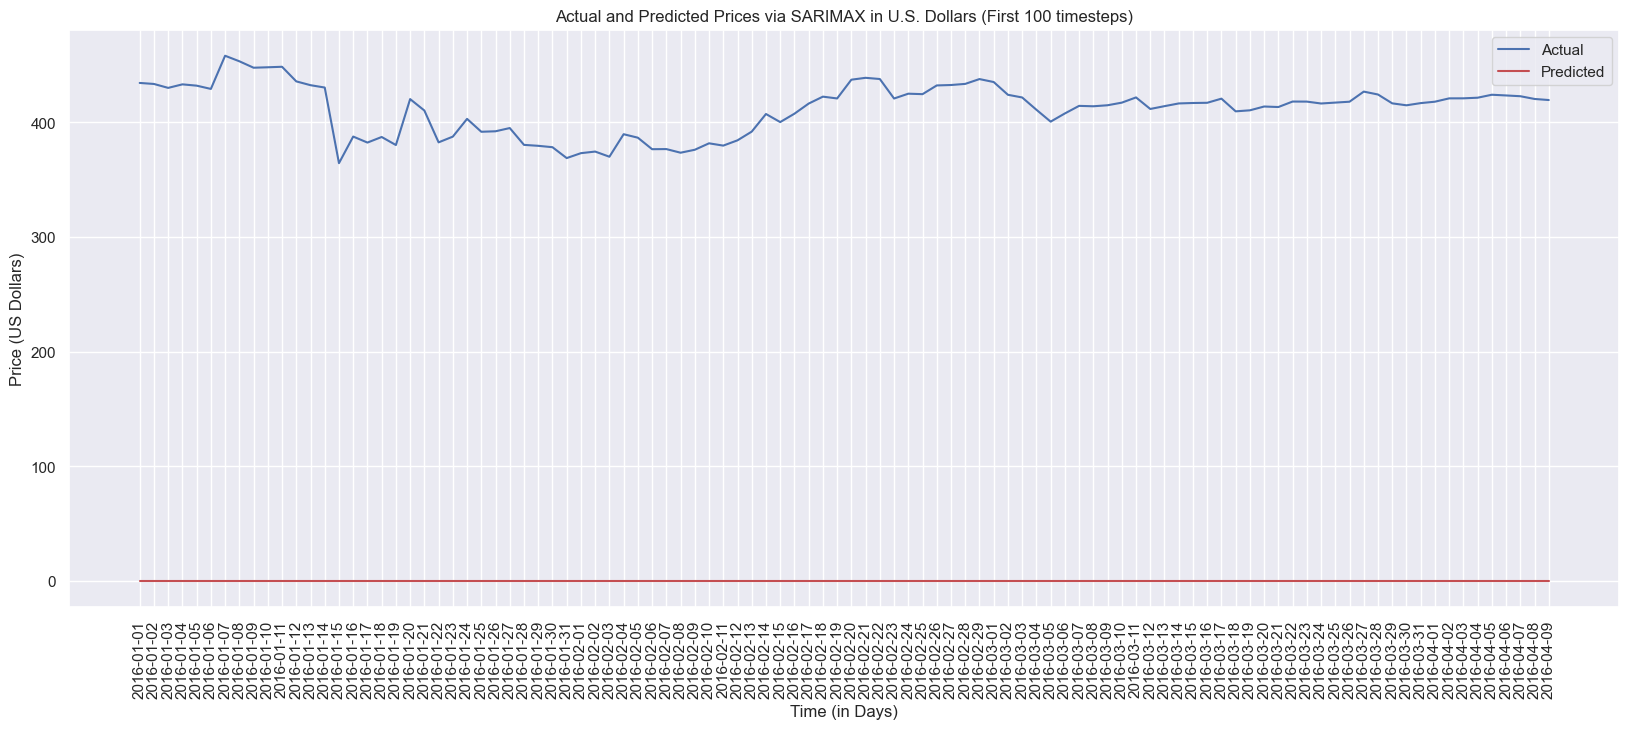

In [70]:
evaluate_model(sarimax_model, df)

Evaluating SARIMAX model...

Mean Squared Error: 48159212.34538379
Mean Absolute Percentage Error: 99.9424250937114
Mean Absolute Error: 5631.871529209621


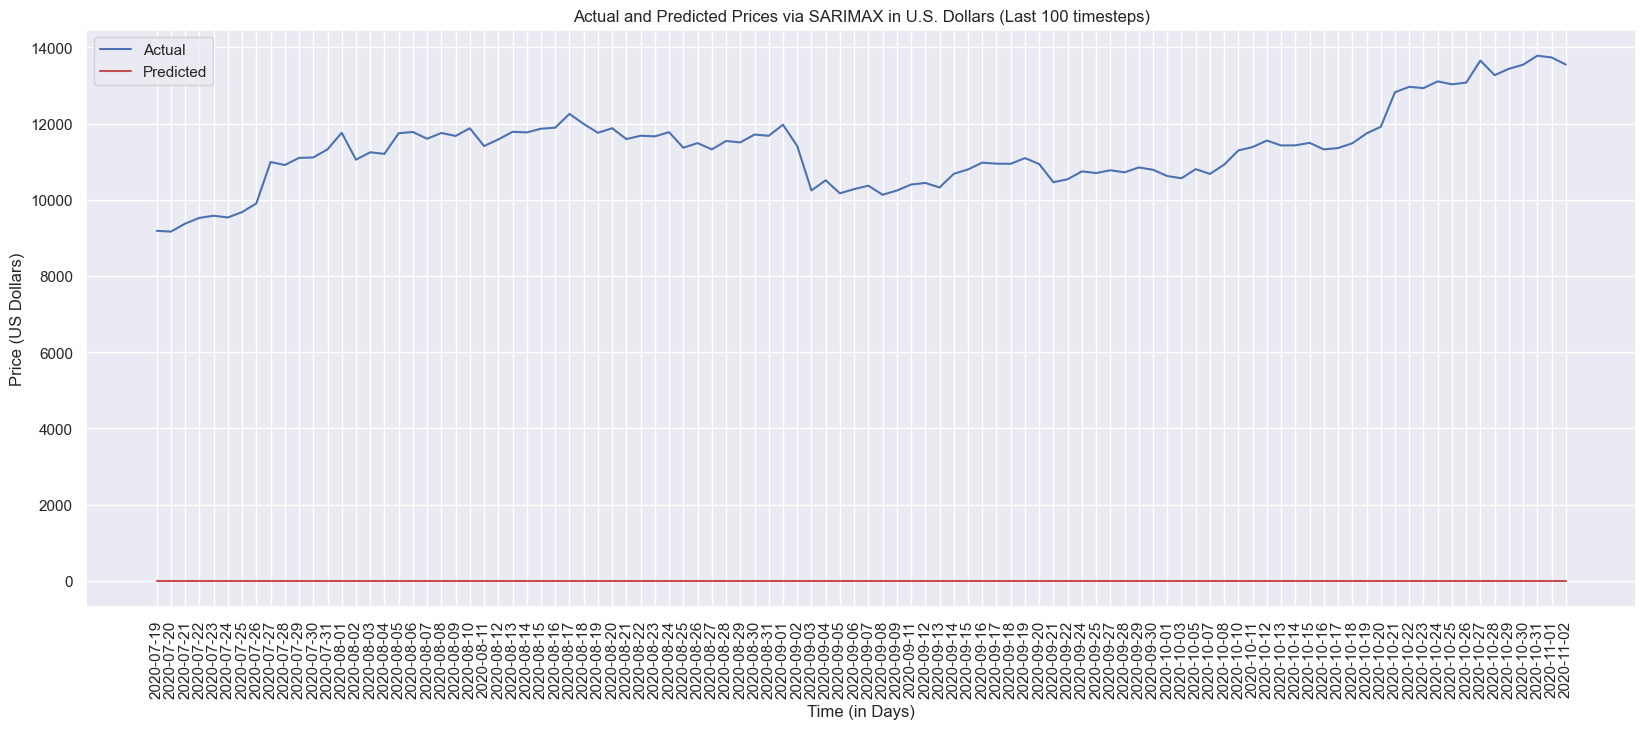

In [71]:
evaluate_model(sarimax_model, df, first_timestep = False)

Evaluating HoltWinters model...

Mean Squared Error: 102960.17339678225
Mean Absolute Percentage Error: 2.535797902570386
Mean Absolute Error: 161.54011999643882


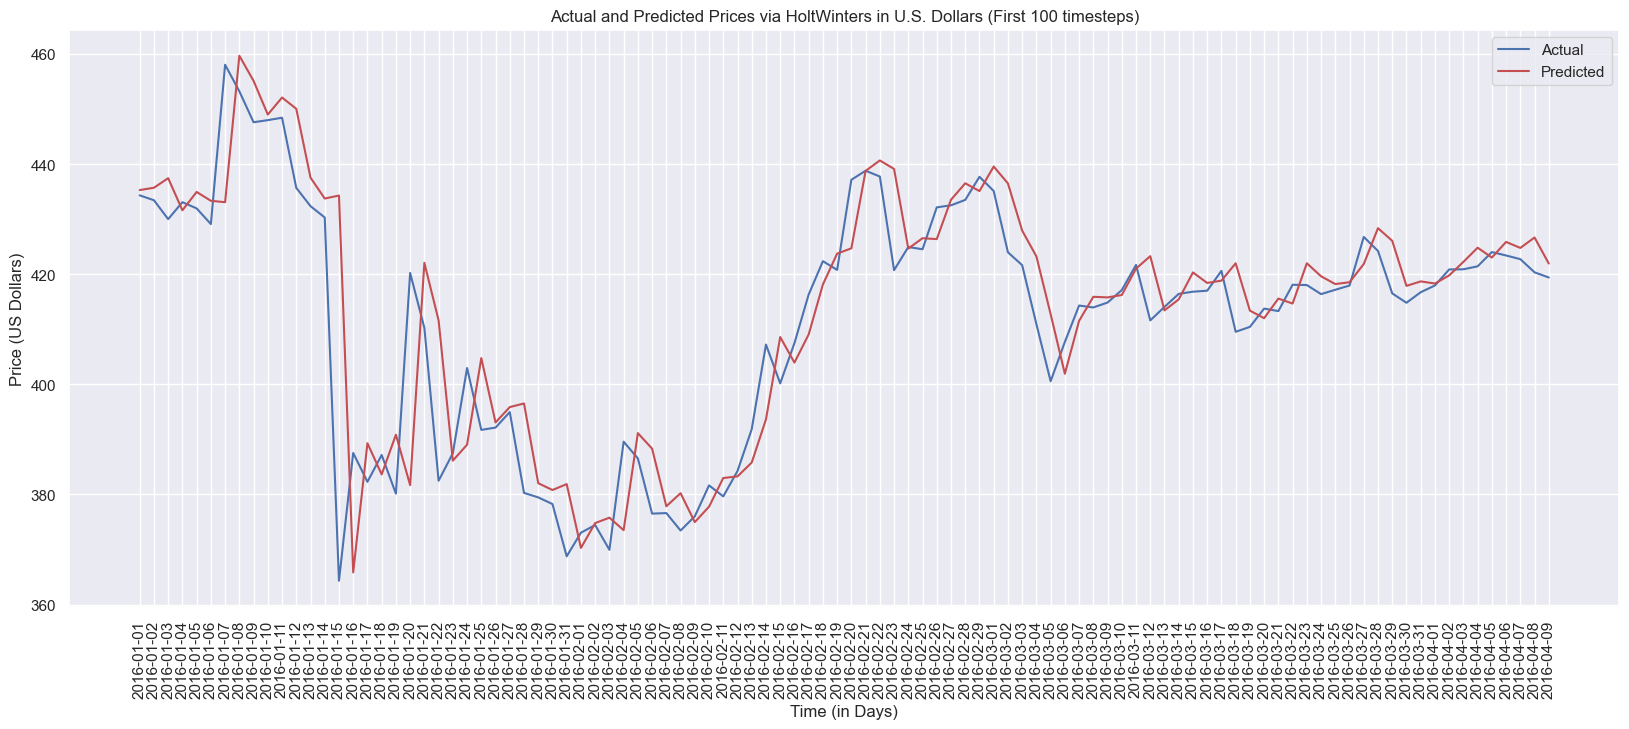

In [72]:
evaluate_model(holt_model, df)

Evaluating HoltWinters model...

Mean Squared Error: 102960.17339678225
Mean Absolute Percentage Error: 2.535797902570386
Mean Absolute Error: 161.54011999643882


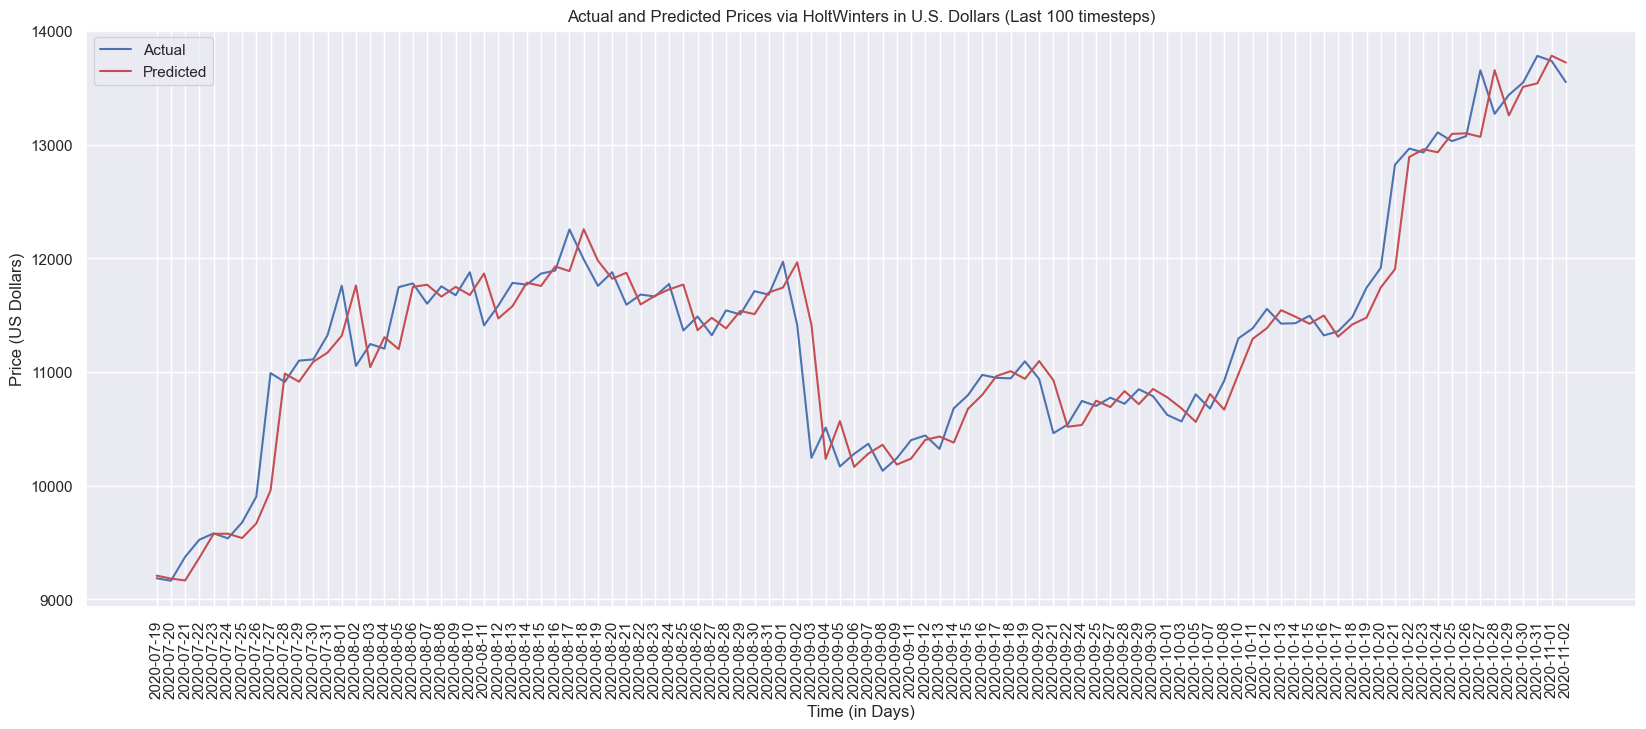

In [73]:
evaluate_model(holt_model, df, first_timestep = False)

Evaluating ExponentialSmoothing model...

Mean Squared Error: 103306.91849650779
Mean Absolute Percentage Error: 2.7888231558101455
Mean Absolute Error: 163.1584151309292


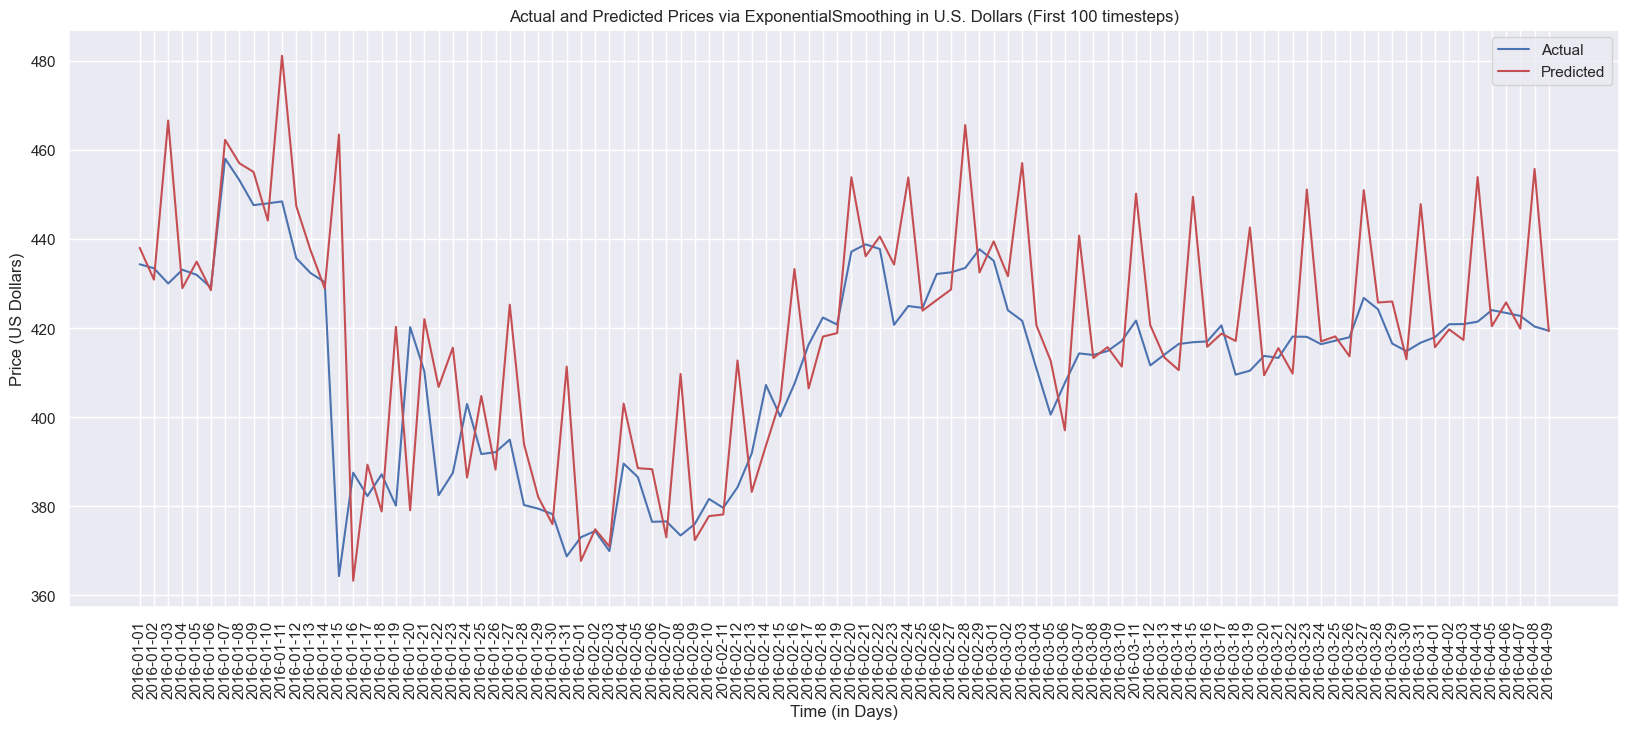

In [74]:
evaluate_model(exp_model, df)

Evaluating ExponentialSmoothing model...

Mean Squared Error: 103306.91849650779
Mean Absolute Percentage Error: 2.7888231558101455
Mean Absolute Error: 163.1584151309292


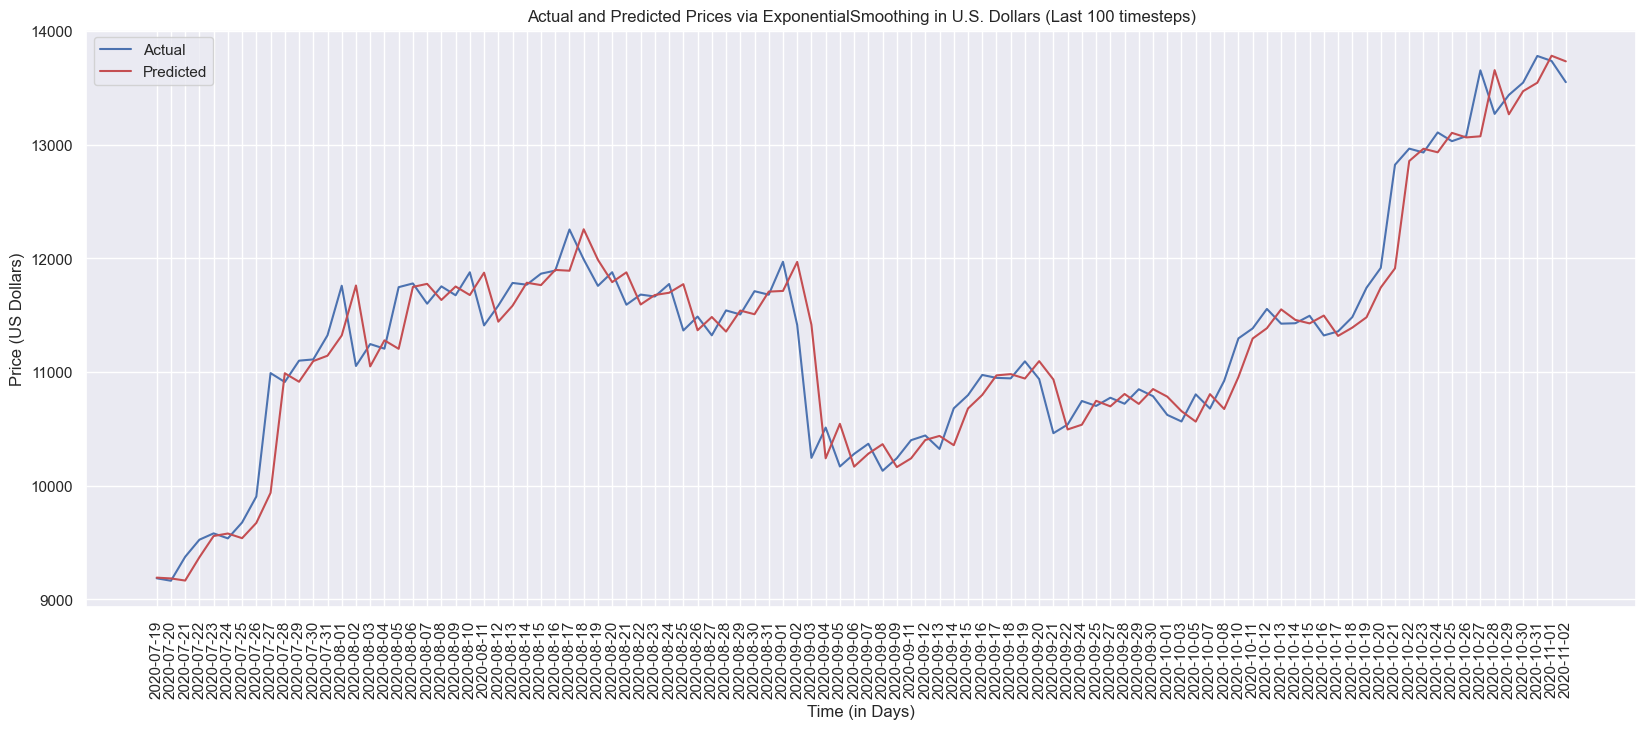

In [75]:
evaluate_model(exp_model, df, first_timestep = False)

In [76]:
import joblib

# Save the model
joblib.dump(arima_model, "arima_model.pkl")

['arima_model.pkl']

In [77]:
arima_model.save("arima_model_reduced.pkl", remove_data=True)